<a href="https://colab.research.google.com/github/Sakeet/oibsip/blob/oibsip_task2/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('WineQT.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Extracting the features to be scaled
features = df.drop(columns=['quality', 'Id'])

# Initializing the scaler and scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Creating a new dataframe with scaled features and original columns
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Adding the 'quality' and 'Id' columns back
scaled_df['quality'] = df['quality'].astype(int)
scaled_df['Id'] = df['Id']

# Displaying the scaled dataframe
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,5,0
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,5,1
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,5,2
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,6,3
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,5,4


In [ ]:
X = scaled_df.drop(columns=['quality','Id'])
y = scaled_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
sgd_model = SGDClassifier(random_state=42)
svc_model = SVC(random_state=42)

rf_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
sgd_predictions = sgd_model.predict(X_test)
svc_predictions = svc_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
svc_accuracy = accuracy_score(y_test, svc_predictions)

rf_report = classification_report(y_test, rf_predictions, zero_division=1)
sgd_report = classification_report(y_test, sgd_predictions, zero_division=1)
svc_report = classification_report(y_test, svc_predictions, zero_division=1)

print("\nRandomForest Accuracy:", rf_accuracy)
print("\nSGDClassifier Accuracy:", sgd_accuracy)
print("\nSpportVectorClassifier Accuracy:", svc_accuracy)
print("\n-------------------------------------------------")
print("\nRandomForest report:\n", rf_report)
print("\n-------------------------------------------------")
print("\nSGDClassifier report:\n", sgd_report)
print("\n-------------------------------------------------")
print("\nSupportVectorClassifier report:\n", svc_report)


RandomForest Accuracy: 0.6943231441048034

SGDClassifier Accuracy: 0.6026200873362445

SpportVectorClassifier Accuracy: 0.6375545851528385

-------------------------------------------------

RandomForest report:
               precision    recall  f1-score   support

           4       1.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.67      0.66      0.66        99
           7       0.68      0.65      0.67        26
           8       1.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.81      0.42      0.42       229
weighted avg       0.70      0.69      0.68       229


-------------------------------------------------

SGDClassifier report:
               precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.66      0.68      0.67        96
     

Confusion Matrix_RF:
 [[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 27 65  7  0]
 [ 0  0  9 17  0]
 [ 0  0  2  0  0]]
Confusion Matrix_SGD:
 [[ 0  0  0  0  0  0]
 [ 0  0  4  2  0  0]
 [ 1  1 65 26  1  2]
 [ 0  0 26 66  3  4]
 [ 0  0  4 13  6  3]
 [ 0  0  0  0  1  1]]
Confusion Matrix_SVC:
 [[ 0  3  3  0  0]
 [ 0 71 25  0  0]
 [ 0 26 68  5  0]
 [ 0  1 18  7  0]
 [ 0  0  1  1  0]]




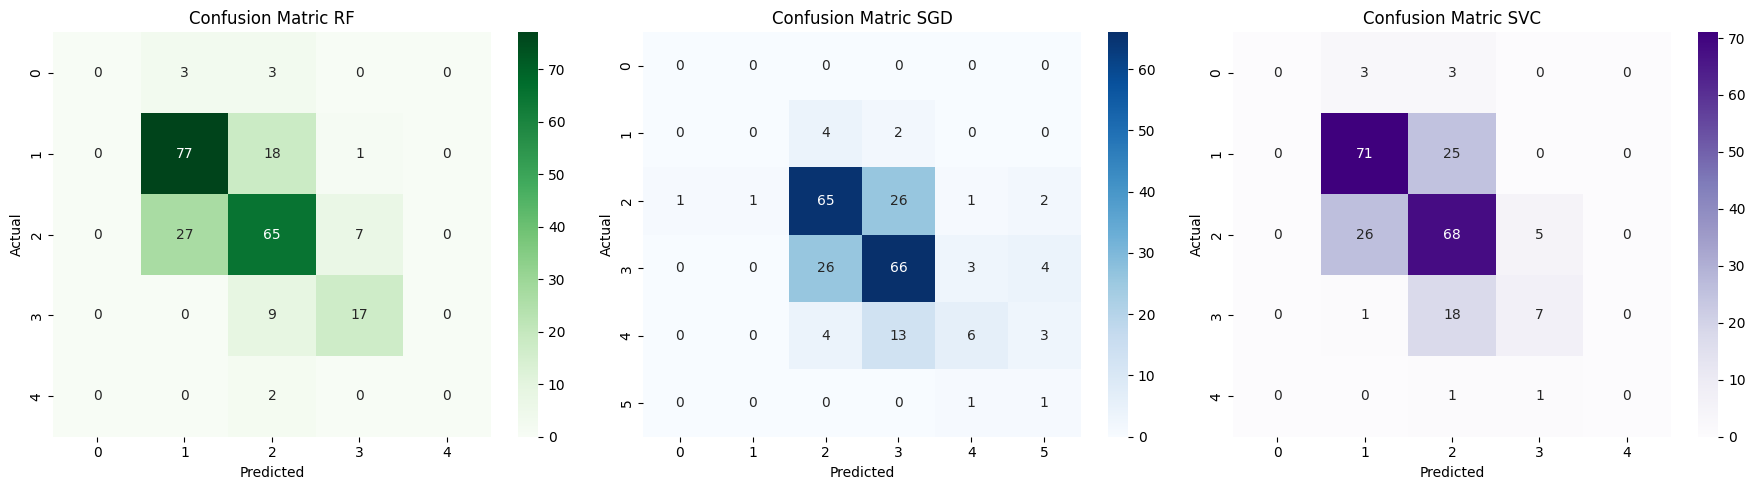

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
conf_matrix_sgd = confusion_matrix(y_test, sgd_predictions)
conf_matrix_svc = confusion_matrix(y_test, svc_predictions)
print("Confusion Matrix_RF:\n", conf_matrix_rf)
print("Confusion Matrix_SGD:\n", conf_matrix_sgd)
print("Confusion Matrix_SVC:\n", conf_matrix_svc)
print("\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(conf_matrix_rf, annot= True, fmt = 'd', cmap = 'Greens', ax=axes[0])
axes[0].set_title('Confusion Matric RF')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_sgd, annot= True, fmt = 'd', cmap = 'Blues', ax=axes[1])
axes[1].set_title('Confusion Matric SGD')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(conf_matrix_svc, annot= True, fmt = 'd', cmap = 'Purples', ax=axes[2])
axes[2].set_title('Confusion Matric SVC')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

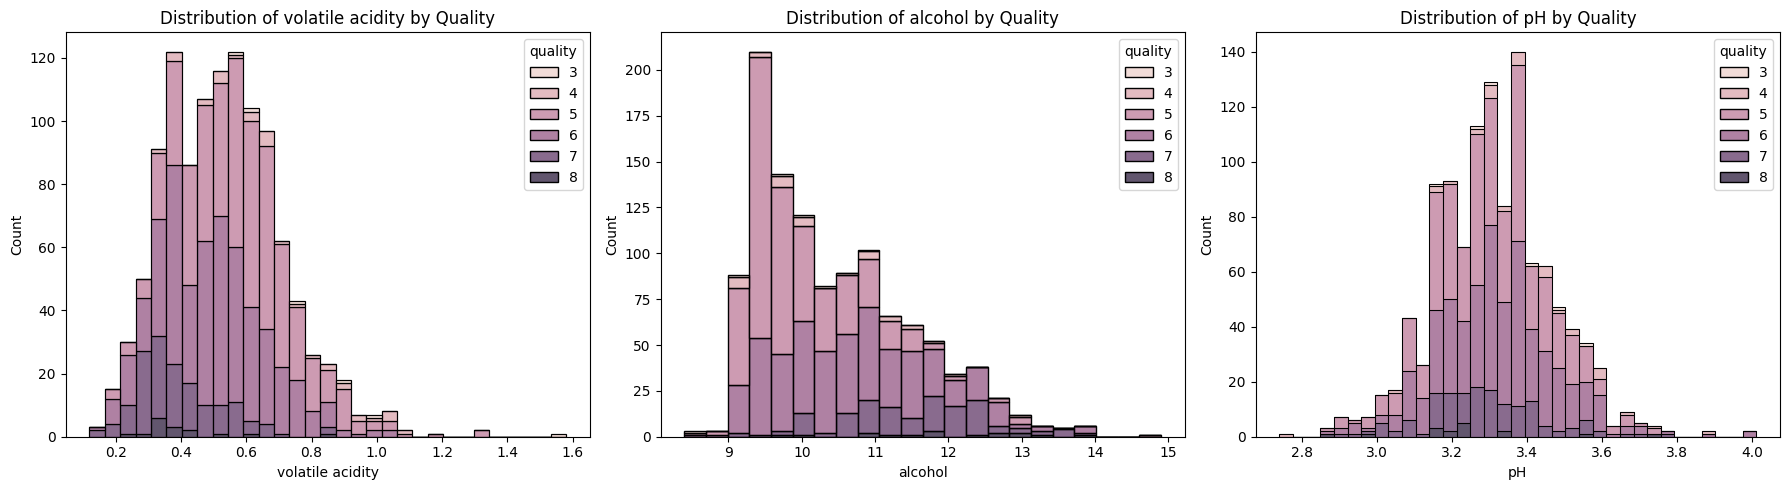

In [ ]:
features = ["volatile acidity", "alcohol", "pH"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue="quality", multiple="stack", ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Quality')

plt.tight_layout()
plt.show()

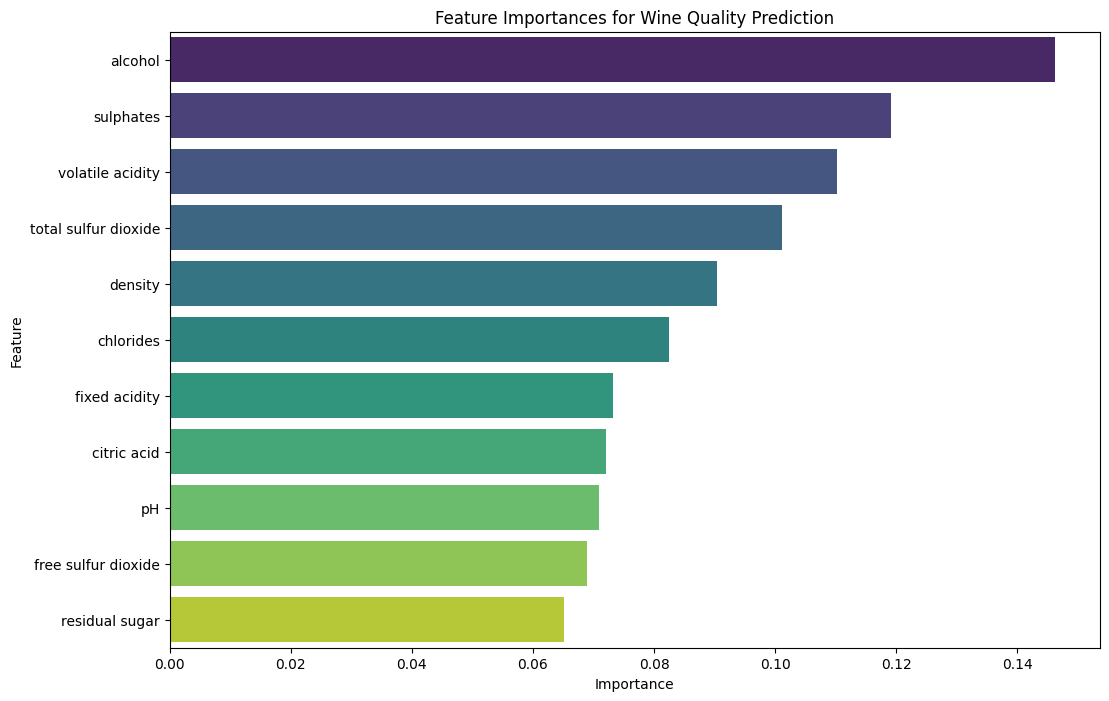

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature' : feature_names, 'Importance' : importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature', palette='viridis', dodge=False, legend=False)
plt.title('Feature Importances for Wine Quality Prediction')
plt.show()

Insights



*   RandomForest Classifier has the highest accuracy for predicting wine quality
*   High quality wines have high alcohol content

